Convolutional neural network for Kaggle's "Digit Recognizer" competition

### Get the kaggle files

In [1]:
# !kaggle competitions download --force -c digit-recognizer

### Imports

In [3]:
# Imports
import os
import math

# Scientific Python
import pandas as pd
import numpy as np

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D

from matplotlib import pyplot as plt

%matplotlib inline

### Read data

In [4]:
# Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Get img size
size = int(math.sqrt(len(train.columns) - 1))

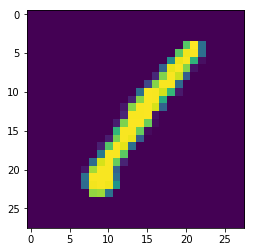

In [7]:
# Inspect a digit 
img = train.loc[0][1:].values.reshape(size, size)
plt.imshow(img, interpolation='nearest')
plt.show()

### Preprocess

In [8]:
y_train = train['label']
X_train = train.loc[:, train.columns != 'label']

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def threshold(val):
    if val > 0:
        return 1
    else:
        return 0

In [11]:
X_train = X_train.applymap(threshold)

In [12]:
# Get the amount of images
X_train.shape

(42000, 784)

In [13]:
# Transform into array of images
X_train = X_train.values.reshape(len(X_train), size, size, 1)

In [14]:
X_test = test

In [15]:
X_test = X_test.applymap(threshold)

In [16]:
# Transform into array of images
X_test = X_test.values.reshape(len(X_test), size, size, 1)

In [17]:
# One-hot encode y
y_train = pd.get_dummies(y_train).values

### Train

In [34]:
def create_model(input_shape, num_classes):
    # Add model layers
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [36]:
# Compile
model = create_model(X_train[0].shape, len(y_train[0]))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 517,162
Trainable params: 517,162
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fit
model.fit(X_train, y_train, epochs=5, validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/5
35700/35700 [==============================] - 218s 6ms/step - loss: 0.0742 - acc: 0.9760 - val_loss: 0.0827 - val_acc: 0.9727
Epoch 2/5
35700/35700 [==============================] - 164s 5ms/step - loss: 0.0473 - acc: 0.9842 - val_loss: 0.0583 - val_acc: 0.9800
Epoch 3/5
35700/35700 [==============================] - 152s 4ms/step - loss: 0.0287 - acc: 0.9907 - val_loss: 0.0642 - val_acc: 0.9827
Epoch 4/5
35700/35700 [==============================] - 152s 4ms/step - loss: 0.0237 - acc: 0.9922 - val_loss: 0.0575 - val_acc: 0.9843
Epoch 5/5
35700/35700 [==============================] - 149s 4ms/step - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0787 - val_acc: 0.9811


### Predict

In [40]:
# Recover classes
y_test = model.predict_classes(X_test)

In [41]:
y_test

array([2, 0, 9, ..., 3, 9, 2])

In [42]:
test = pd.DataFrame(y_test).reset_index()
test.columns = ['ImageId', 'Label']
test['ImageId'] = test['ImageId'] + 1

### Submit

In [44]:
# Save to csv
test.to_csv('submission.csv', index=False)

In [49]:
# Push to kaggle
# !kaggle competitions submit -f submission.csv -m convolutional_neural_network digit-recognizer

In [48]:
# View submissions
# !kaggle competitions submissions digit-recognizer